# Lezione 1 - Esercizi

#### Prendiamo dimestichezza con Python dentro al Jupyter Notebook e con le librerie per fare grafici.

Provate a svolgere i seguenti esercizi: <br>
1) [Fattoriale](#section1)<a href='#section1'></a> <br>
2) [Serie di Fibonacci](#section2)<a href='#section2'></a><br>
3) [Esempio di Plot](#section3)<a href='#section3'></a> <br>
4) [Esercizio di Plot di un file root](#section4)<a href='#section4'></a> <br>


<a id='section1'></a>
## 1) Fattoriale

Scrivere in Python una funzione fatt che calcola il fattoriale di un numero dato come parametro. <br>
Se siete coraggiosi provate a scriverla ricorsiva!

In [5]:
def fatt(d):
    """ La funzione calcola il fattoriale del numero d passato come parametro.
    La funzione restituisce -1 in caso di errore.
    
    >>> fatt(6)
    720
    """
    
    # Resto della funzione, da scrivere!
    if type(d) is not int or d < 0:
        print("Erorre il parametro passato non è corretto, deve essere un intero positivo.")
        return -1
    
    risultato = 1
    for n in range(1, d + 1):
        risultato *= n
        
    return risultato

fatt(6)

720

In [7]:
def fatt(d):
    """ La funzione calcola il fattoriale del numero d passato come parametro.
    La funzione restituisce -1 in caso di errore.
    
    >>> fatt(6)
    720
    """
    
    # Resto della funzione, da scrivere!
    if type(d) is not int or d < 0:
        print("Erorre il parametro passato non è corretto, deve essere un intero positivo.")
        return -1
    
    if d == 0:
        return 1
    
    return d * fatt(d - 1)

fatt(0)

1

<a id='section2'></a>
## 2) Serie di Fibonacci

Scrivere una funzione Python che restituisce i primi n numeri della serie di Fibonacci.

In [8]:
def fibonacci(nterms):
    """ La funzione restituisce una lista con i primi nterms numeri della serie di Fibonacci.
    
    >>> fib(10)
    [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
    """
    
    # Resto della funzione, da scrivere!
    if type(nterms) is not int or nterms < 0:
        print("errore il parametro è errato, deve essere un intero positivo")
        return None
    
    n1, n2 = 0, 1
    
    lista = []
    for count in range(0, nterms):
        lista.append(n1)
        n1, n2 = n2, n1 + n2
    
    return lista
    
fibonacci(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

<a id='section3'></a>
## 3) Esempio di plot

Per fare dei grafici è possibile utilizzare la libreria `matplotlib`.

In [9]:
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [30]:
help(np.linspace)

Help on function linspace in module numpy.core.function_base:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    Parameters
    ----------
    start : scalar
        The starting value of the sequence.
    stop : scalar
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is the last sample. Otherwise, it is not included.
        Default is True.
    retstep : bo

In [11]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 2.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

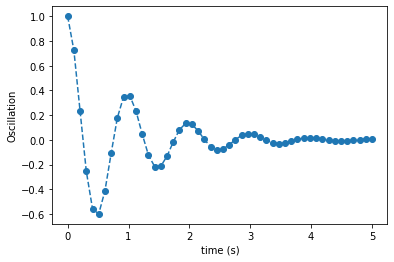

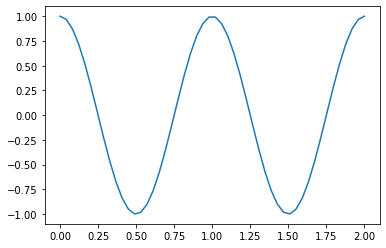

In [25]:
# Disegnare i grafici utilizzando pyplot
plt.plot(x1, y1, 'o--')
plt.xlabel('time (s)')
plt.ylabel('Oscillation')
plt.show()

plt.plot(x2, y2)
plt.show()

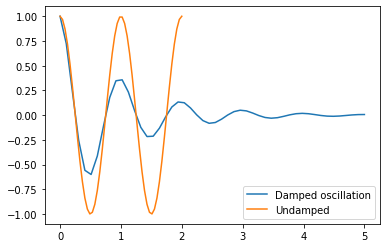

In [32]:
import seaborn as sns
ax = sns.lineplot(x1, y1, label='Damped oscillation')
ax = sns.lineplot(x2, y2, label='Undamped')
ax.legend(loc='lower right')

<a id='section4'></a>
## 4) Esercizio di Plot di un file root

In questo esercizio utilizzeremo anche una libreria aggiuntiva che si chiama `uproot` e che serve a leggere i files in formato root.

In [33]:
!pip install uproot

In [34]:
import uproot
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

treename = 'HZZ4LeptonsAnalysisReduced'
filename ='data/ntuple_4mu_bkg.root'

upfile = uproot.open(filename)
params = upfile[treename].arrays() # dictionary of NumPy arrays

VARS = [b'f_mass4l', b'f_massjj']
df = pd.DataFrame(params, columns=VARS)

In [35]:
df.describe()

,b'f_mass4l',b'f_massjj'
count,58107.000000,58107.000000
mean,214.346069,-891.822449
std,123.011841,352.657990
min,70.003792,-999.000000
25%,112.146431,-999.000000
50%,204.004684,-999.000000
75%,259.251389,-999.000000
max,2275.151367,2427.755859


(0, 1000)

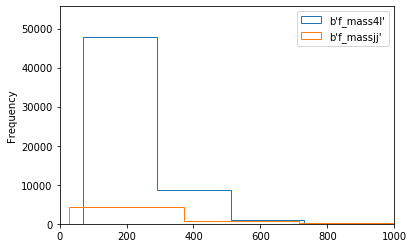

In [40]:
# Disegnare il grafico utilizzando pyplot
ax = df[VARS[0]].plot.hist(bins=10, label=VARS[0], histtype='step')
ax = df[VARS[1]].plot.hist(bins=10, label=VARS[1], histtype='step')
ax.legend(loc='upper right')

ax.set_xlim(0, 1000)

(0, 1000)

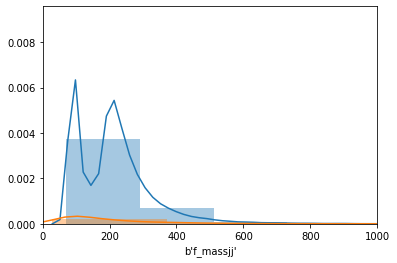

In [43]:
import seaborn as sns
ax = sns.distplot(df[VARS[0]], bins=10, kde=True)
ax = sns.distplot(df[VARS[1]], bins=10, kde=True)

ax.set_xlim(0, 1000)

(0, 1000)

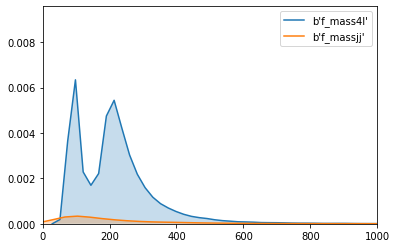

In [45]:
ax = sns.kdeplot(df[VARS[0]], shade=True)
ax = sns.kdeplot(df[VARS[1]], shade=True)

ax.set_xlim(0, 1000)

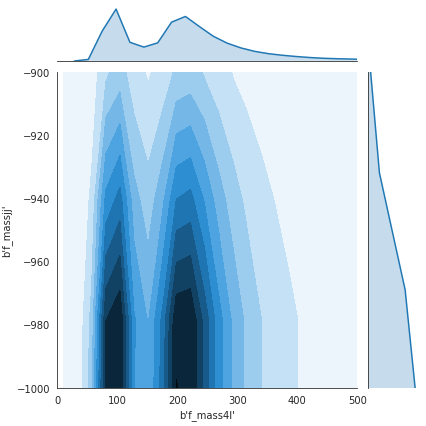

In [48]:
with sns.axes_style('white'):
    ax = sns.jointplot(VARS[0], VARS[1], df, kind='kde', xlim=(0, 500), ylim=(-1000, -900))

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>